In [12]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('Data/wine.csv')

In [13]:
df.nunique() # смотрим на кол-во уникальных признаков

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [14]:
df.info() # посмотрим на типы признаков. Претендента всего 2: points, price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

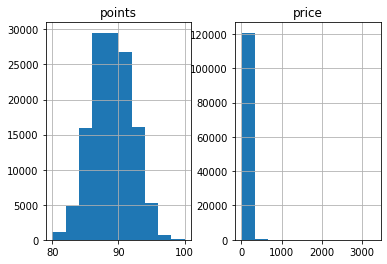

In [15]:
hist = df.hist()
hist

In [16]:
mask = df.duplicated(subset=df.columns) # маска для фильтрации
data_duplicates = df[mask] # фильтруем наш датасет
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

Число найденных дубликатов: 9983


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


<AxesSubplot:>

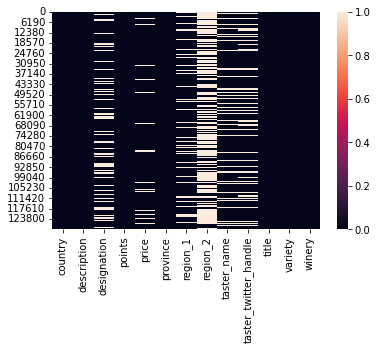

In [18]:
sns.heatmap(df.isnull()) # наглядная карта пропусков

In [19]:
df = df.drop(['region_2'], axis=1) # имеет порядка 60% пропусков, лучше избавиться от такого признака

<AxesSubplot:>

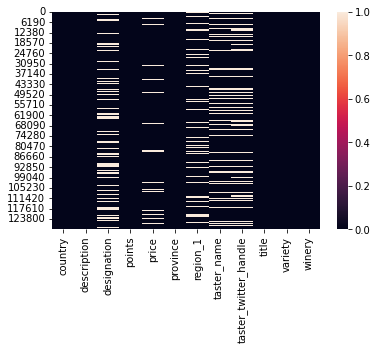

In [20]:
sns.heatmap(df.isnull()) # смотрим, какие признаки остались

In [21]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [22]:
df.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129971.000000,120975.000000,129908,108724,103727,98758,129971,129970,129971
unique,43,119955,37979,NaN,NaN,425,1229,19,15,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,NaN,NaN,36247,4480,25514,25514,11,13272,222
mean,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

df['designation'] = df['designation'].fillna('unknown')
df['region_1'] = df['region_1'].fillna('unknown')
df['taster_name'] = df['taster_name'].fillna('unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
df['country'] = df['country'].fillna('US')
df['price'] = df['price'].fillna(df['price'].mean())
df['province'] = df['province'].fillna('California')
df['variety'] = df['variety'].fillna('Pinot Noir')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [25]:
# в числовом признаке выберем метод замены средним значением
df['price'] = df['price'].fillna(df['price'].mean())

<AxesSubplot:>

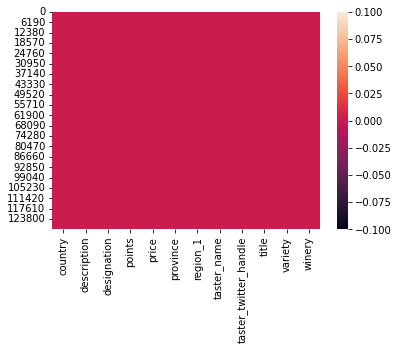

In [26]:
sns.heatmap(df.isnull()) # убеждаемся, что датасет без пропусков

In [27]:
df = df.to_csv('Data/wine_cleared.csv', index=False) # сохраняем очищенный датасет для дальнейшей работы